Button(description='Next Generation', icon='check', style=ButtonStyle(), tooltip='Next Generation')

-20.0
-19.595959595959595
-19.19191919191919
-18.78787878787879
-18.383838383838384
-17.97979797979798
-17.575757575757574
-17.171717171717173
-16.767676767676768
-16.363636363636363
-15.959595959595958
-15.555555555555555
-15.151515151515152
-14.747474747474747
-14.343434343434343
-13.93939393939394
-13.535353535353536
-13.131313131313131
-12.727272727272727
-12.323232323232324
-11.919191919191919
-11.515151515151516
-11.11111111111111
-10.707070707070708
-10.303030303030303
-9.8989898989899
-9.494949494949495
-9.090909090909092
-8.686868686868687
-8.282828282828284
-7.878787878787879
-7.474747474747476
-7.070707070707071
-6.666666666666666
-6.262626262626263
-5.858585858585858
-5.454545454545455
-5.05050505050505
-4.646464646464647
-4.242424242424242
-3.8383838383838373
-3.434343434343436
-3.030303030303031
-2.6262626262626263
-2.2222222222222214
-1.8181818181818201
-1.4141414141414153
-1.0101010101010104
-0.6060606060606055
-0.20202020202020066
0.20202020202020066
0.6060606060606055

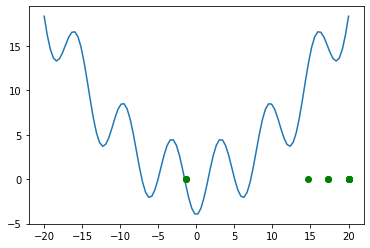

In [ ]:
#ExampleGA.ipynb
#Example of Genetic Algorithm
#Jorge Luis Rosas Trigueros
#Last modified 23ago21 12:26

import ipywidgets as widgets

def create_button():
  button = widgets.Button(
    description='Next Generation',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Next Generation',
    icon='check' # (FontAwesome names without the `fa-` prefix)
  )
  return button

import math
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython import display as display

from functools import cmp_to_key
#Chromosomes are 4 bits long
L_chromosome=4
N_chains=2**L_chromosome
#Lower and upper limits of search space
a=-20
b=20
crossover_point=int(L_chromosome/2)


def random_chromosome():
    chromosome=[]
    for i in range(0,L_chromosome):
        if random.random()<0.1:
            chromosome.append(0)
        else:
            chromosome.append(1)

    return chromosome

#Number of chromosomes
N_chromosomes=10
#probability of mutation
prob_m=0.5

F0=[]
fitness_values=[]

for i in range(0,N_chromosomes):
    F0.append(random_chromosome())
    fitness_values.append(0)

#binary codification
def decode_chromosome(chromosome):
    global L_chromosome,N_chains,a,b
    value=0
    for p in range(L_chromosome):
        value+=(2**p)*chromosome[-1-p]

    return a+(b-a)*float(value)/(N_chains-1)



def f(x):
    print(x)
    return 0.05*x*x-4*math.cos(x)



def evaluate_chromosomes():
    global F0

    for p in range(N_chromosomes):
        v=decode_chromosome(F0[p])
        fitness_values[p]=f(v)
        

def compare_chromosomes(chromosome1,chromosome2):
    vc1=decode_chromosome(chromosome1)
    vc2=decode_chromosome(chromosome2)
    fvc1=f(vc1)
    fvc2=f(vc2)
    if fvc1 > fvc2:
        return 1
    elif fvc1 == fvc2:
        return 0
    else: #fvg1<fvg2
        return -1


suma=float(N_chromosomes*(N_chromosomes+1))/2.

Lwheel=N_chromosomes*10

def create_wheel():
    global F0,fitness_values

    maxv=max(fitness_values)
    acc=0
    for p in range(N_chromosomes):
        acc+=maxv-fitness_values[p]
    fraction=[]
    for p in range(N_chromosomes):
        fraction.append( float(maxv-fitness_values[p])/acc)
        if fraction[-1]<=1.0/Lwheel:
            fraction[-1]=1.0/Lwheel
##    print fraction
    fraction[0]-=(sum(fraction)-1.0)/2
    fraction[1]-=(sum(fraction)-1.0)/2
##    print fraction

    wheel=[]

    pc=0

    for f in fraction:
        Np=int(f*Lwheel)
        for i in range(Np):
            wheel.append(pc)
        pc+=1

    return wheel
        
F1=F0[:]

def nextgeneration(b):
    display.clear_output(wait=True)
    display.display(button)
    F0.sort(key=cmp_to_key(compare_chromosomes) )
    print( "Best solution so far:")
    print( "f(",decode_chromosome(F0[0]),")= ", f(decode_chromosome(F0[0])) )
                                                                    
    #elitism, the two best chromosomes go directly to the next generation
    F1[0]=F0[0]
    F1[1]=F0[1]
    for i in range(0,int((N_chromosomes-2)/2)):
        roulette=create_wheel()
        #Two parents are selected
        p1=random.choice(roulette)
        p2=random.choice(roulette)
        #Two descendants are generated
        o1=F0[p1][0:crossover_point]
        o1.extend(F0[p2][crossover_point:L_chromosome])
        o2=F0[p2][0:crossover_point]
        o2.extend(F0[p1][crossover_point:L_chromosome])
        #Each descendant is mutated with probability prob_m
        if random.random() < prob_m:
            o1[int(round(random.random()*(L_chromosome-1)))]^=1
        if random.random() < prob_m:
            o2[int(round(random.random()*(L_chromosome-1)))]^=1
        #The descendants are added to F1
        F1[2+2*i]=o1
        F1[3+2*i]=o2

    graph_population(F1)
    #The generation replaces the old one
    F0[:]=F1[:]




xmax=400
ymax=400

xo=200
yo=200

s=10


N=100

global_fig = plt.figure()
ax = plt.axes()

def graph_f():
    xini=-20.
    xfin=20.
    x=np.linspace(xini,xfin,100)
    y=list(map(f,x))
    plt.plot(x,y)

def graph_population(F):
    x=list(map(decode_chromosome,F))
    graph_f()
    plt.plot(x,y_population,'go')

button=create_button()
button.on_click(nextgeneration)
display.display(button)

x=list(map(decode_chromosome,F0))
y_population=np.zeros(N_chromosomes)
graph_f()
plt.plot(x,y_population,'go')
F0.sort(  key=cmp_to_key(compare_chromosomes))
evaluate_chromosomes()

In [ ]:
chromosome = [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
L_chromosome = 16
value = [0, 0]
for p in range(int(L_chromosome/2)):
        value[1]+=(2**p)*chromosome[-1-p]

p=0
for c in range(int(L_chromosome/2), L_chromosome):
        value[0]+=(2**p)*chromosome[-1-c]
        p += 1
a=-5.12
b = 5.12
N_chains = 2**L_chromosome
xy = [0,0]
xy[0] = a+(b-a)*float(value[0])/(N_chains-1)
xy[1] = a+(a-b)*float(value[1])/(N_chains-1)

print(value, xy)

[135, 100] [-5.098905928130007, -5.039998779278249]
